In [1]:
# plot figures inline with matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define our test distribution: a mix of Cauchy-distributed variables
import numpy as np
from scipy import stats

np.random.seed(0)
x = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
x = x[(x > -15) & (x < 15)]

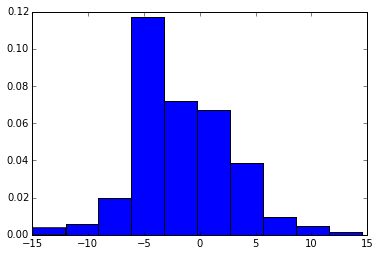

In [3]:
# Histogram the result
import pylab as pl
H = pl.hist(x, normed=True)
#pl.savefig('bayesblocks1.png')

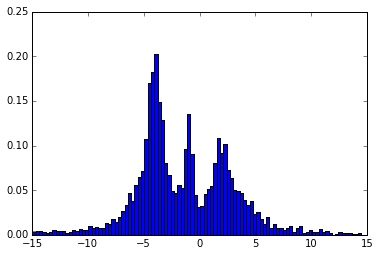

In [4]:

# Histogram with more bins
H = pl.hist(x, bins=100, normed=True)
#pl.savefig('bayesblocks2.png')

In [5]:
def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size

    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges

    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]
    
    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points =  np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
    change_points = change_points[i_cp:]

    return edges[change_points]

In [6]:
x_sort = np.sort(x)
print(len(x_sort))
x_sub = x_sort[2000:2016]
print(x_sub[:-1])
edges2 = np.concatenate( [x_sub[:1], 0.5*(x_sub[1:] + x_sub[:-1]), x_sub[-1:]])
print(x_sub)
print(edges2)

4323
[-2.780238   -2.77859664 -2.77695173 -2.77672852 -2.77246834 -2.77066611
 -2.77018676 -2.76760782 -2.76676429 -2.762392   -2.76141795 -2.75645176
 -2.75607458 -2.75586991 -2.75310667]
[-2.780238   -2.77859664 -2.77695173 -2.77672852 -2.77246834 -2.77066611
 -2.77018676 -2.76760782 -2.76676429 -2.762392   -2.76141795 -2.75645176
 -2.75607458 -2.75586991 -2.75310667 -2.7510195 ]
[-2.780238   -2.77941732 -2.77777418 -2.77684012 -2.77459843 -2.77156722
 -2.77042643 -2.76889729 -2.76718606 -2.76457814 -2.76190497 -2.75893485
 -2.75626317 -2.75597225 -2.75448829 -2.75206309 -2.7510195 ]


In [7]:
block_length2 = x_sub[-1] - edges2
print(block_length2)
K = 5 
#K = len(block_length2)-3
width = block_length2[:K + 1] - block_length2[K + 1]
print(width)
print(block_length2[K+1])
print(block_length2[:K+2])
print(bayesian_blocks(x))

[ 0.02921849  0.02839782  0.02675468  0.02582062  0.02357893  0.02054772
  0.01940693  0.01787779  0.01616656  0.01355864  0.01088547  0.00791535
  0.00524367  0.00495275  0.00346879  0.00104359  0.        ]
[ 0.00981156  0.00899088  0.00734775  0.00641369  0.004172    0.00114079]
0.0194069311327
[ 0.02921849  0.02839782  0.02675468  0.02582062  0.02357893  0.02054772
  0.01940693]
[-14.97136966  -9.97833787  -8.30032639  -7.20947227  -6.5664823
  -5.61111739  -4.93909444  -4.63517611  -3.67195943  -3.30025458
  -2.72032808  -1.31563551  -0.68004784  -0.32148883   0.48496711
   1.39257178   2.36089893   3.10617066   4.68536101   6.16901031
   9.11405688  11.53270207  14.5052249 ]


In [8]:
N = len(x_sub)
nn_vec = np.ones(N)
count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]
print(nn_vec)
print(count_vec)
print(np.cumsum(nn_vec[:K+1][::-1])[::-1])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 6.  5.  4.  3.  2.  1.]
[ 6.  5.  4.  3.  2.  1.]


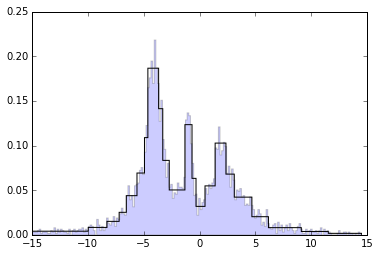

In [9]:
# plot a standard histogram in the background, with alpha transparency
H1 = hist(x, bins=200, histtype='stepfilled', alpha=0.2, normed=True)
# plot an adaptive-width histogram on top
H2 = hist(x, bins=bayesian_blocks(x), color='black', histtype='step', normed=True)
#pl.savefig('bayesblocks3.png')

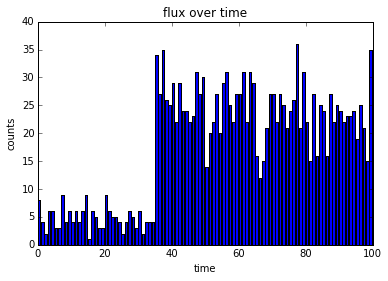

In [10]:
time_bins = []
f_vals = []
for t in range(35):
    time_bins.append(t)
    f_vals.append(stats.poisson(5.).rvs(1)[0])
for t in range(35, 100):
    time_bins.append(t)
    f_vals.append(stats.poisson(25.).rvs(1)[0])

    
plt.bar(time_bins, f_vals)
plt.xlabel('time')
plt.ylabel('counts')
plt.title("flux over time")

In [11]:
bayes_blocks = bayesian_blocks(f_vals)
print(bayes_blocks)

[  1.   2.   2.  36.]


/Users/mbuchove/Programs/Anaconda3/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: divide by zero encountered in log


In [12]:
bayesian_blocks(x)

array([-14.97136966,  -9.97833787,  -8.30032639,  -7.20947227,
        -6.5664823 ,  -5.61111739,  -4.93909444,  -4.63517611,
        -3.67195943,  -3.30025458,  -2.72032808,  -1.31563551,
        -0.68004784,  -0.32148883,   0.48496711,   1.39257178,
         2.36089893,   3.10617066,   4.68536101,   6.16901031,
         9.11405688,  11.53270207,  14.5052249 ])